<a href="https://colab.research.google.com/github/thorat1607/thorat1607/blob/Bharat_Intern/Task_1_Stock_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load stock price data

data = pd.read_csv('/content/NFLX.csv')
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# Split data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [ ]:
# Function to create LSTM dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


In [ ]:
# Prepare training and test datasets
look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 10s 12ms/step - loss: 0.0302
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 8/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 11/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 12/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 13/100
24/24 [==============

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train.reshape(-1), train_predict.reshape(-1))
test_mse = mean_squared_error(y_test.reshape(-1), test_predict.reshape(-1))

print(f"Train Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")

# Calculate accuracy (Not commonly used for regression tasks)
train_accuracy = 100 * (1 - train_mse / np.var(y_train))
test_accuracy = 100 * (1 - test_mse / np.var(y_test))

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")



Train Mean Squared Error (MSE): 0.00
Test Mean Squared Error (MSE): 0.00
Train Accuracy: 98.29%
Test Accuracy: 94.95%


In [ ]:
# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

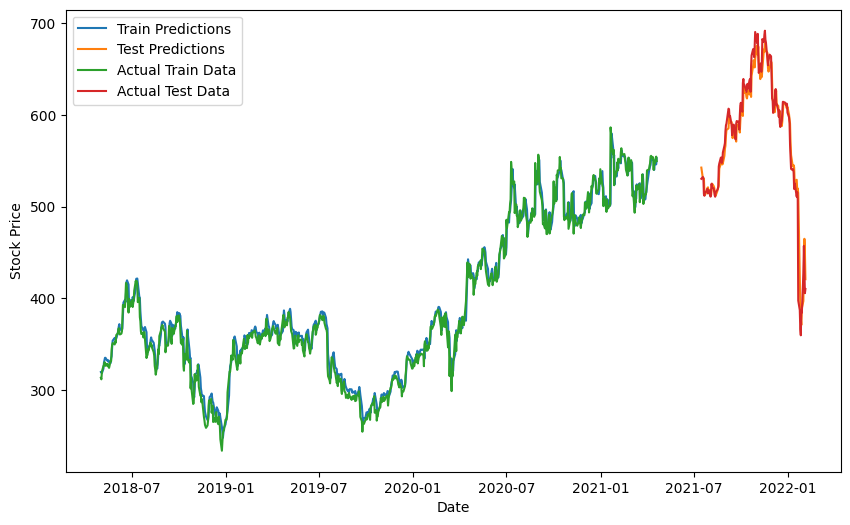

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[look_back:train_size], train_predict.reshape(-1), label='Train Predictions')
plt.plot(data.index[train_size+look_back:], test_predict.reshape(-1), label='Test Predictions')
plt.plot(data.index[look_back:train_size], y_train.reshape(-1), label='Actual Train Data')
plt.plot(data.index[train_size+look_back:], y_test.reshape(-1), label='Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

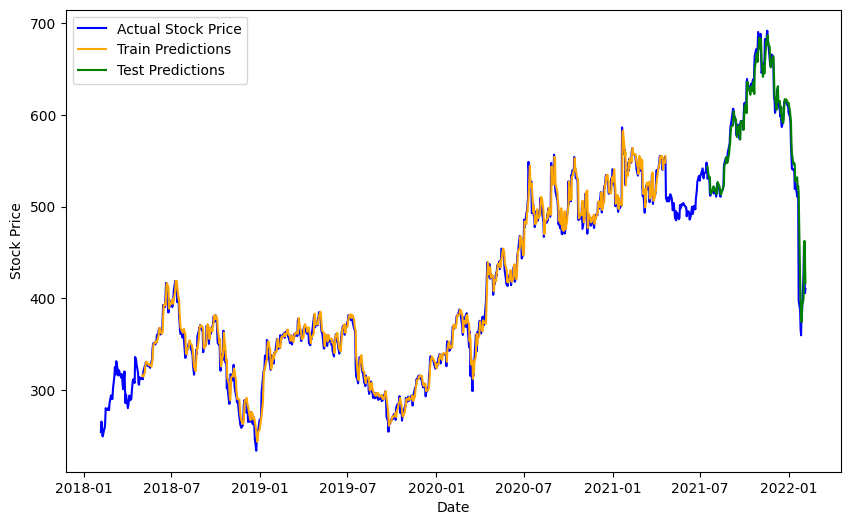

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Stock Price', color='blue')
plt.plot(data.index[look_back:train_size], train_predict.reshape(-1), label='Train Predictions', color='orange')
plt.plot(data.index[train_size+look_back:], test_predict.reshape(-1), label='Test Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
